In [116]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [117]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=True, add_outlier=True)
# height, weight, gender = load_data(sub_sample=True, add_outlier=False)
# height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [118]:
y.shape, tx.shape

((202,), (202, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [119]:
def compute_loss_MSE(y, tx, w):
    """Calculate the loss using mean squared error (MSE)."""
    N = len(y)
    e = y - tx @ w
    return e.T @ e / N

In [120]:
def compute_loss_MAE(y, tx, w):
    """Calculate the loss using mean absolute error (MAE)."""
    N = len(y)
    e = y - tx @ w
    return np.abs(e).T @ np.ones(N)

In [121]:
def compute_loss(y, tx, w, method="MSE"):
    """Calculate the loss using mean squared error (MSE)."""
    N = len(y)
    e = y - tx @ w
    if method == "MSE":
        loss = e.T @ e / N
    elif method == "MAE":
        loss = np.abs(e).T @ np.ones(N)
    
    return loss

In [122]:
compute_loss_2(y, tx, w, "MAE")

14759.69678269513

In [123]:
w = np.array([1, 2])

In [124]:
compute_loss(y, tx, w)

5552.395037897896

# 2 Grid Search

Fill in the function `grid_search()` below:

In [125]:
for i, el in enumerate(w):
    # print("hello " + str(i))
    print("element {} of w equals {}".format(i, el))

element 0 of w equals 1
element 1 of w equals 2


In [126]:
def grid_search(y, tx, w0, w1, method="MSE"):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    for i, w_0 in enumerate(w0):
        for j, w_1 in enumerate(w1):
            losses[i, j] = compute_loss(y, tx, [w_0, w_1], method)
            # losses[i, j] = compute_loss(y, tx, [w_0, w_1])
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=142.25403922169858, w0*=71.42857142857142, w1*=9.183673469387742, execution time=0.053 seconds


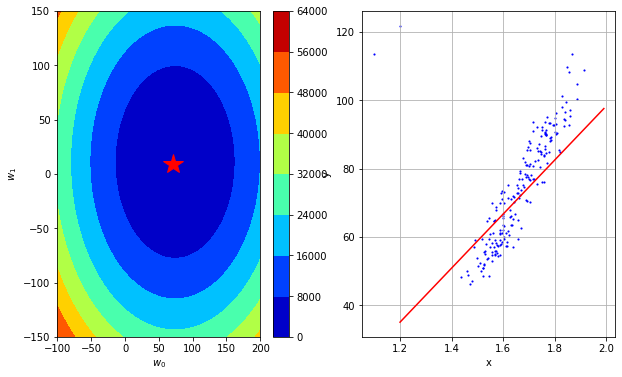

In [127]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [128]:
def compute_error_vec(y, tx, w):
    """Compute the error vector: y - Xw"""
    return y - tx @ w

In [129]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    N = len(y)
    e = y - tx @ w
    return - tx.T @ e / N

Please fill in the functions `gradient_descent` below:

In [130]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    N = len(y)
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        gradient = compute_gradient(y, tx, w)
        e = compute_error_vec(y, tx, w)
        loss = e.T @ e / (2 * N)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        # w -= gamma * gradient
        w = w - gamma * gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [133]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
# max_iters = 100
# gamma = 0.7
# gamma = 0.001
gamma = 0.1
# gamma = 0.1
# gamma = 0.5
# gamma = 1
# gamma = 2
# gamma = 2.5

# Initialization
w_initial = np.array([0, 0])
# w_initial = np.array([100, 10])
# w_initial = np.array([-1000, 1000])

# Start gradient descent.
start_time = datetime.datetime.now()
subgradient_losses, subgradient_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Subgradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Subgradient Descent(0/49): loss=14961.69678269513, w0=0.1, w1=8.727891896558162e-17
Subgradient Descent(1/49): loss=14941.496782695129, w0=0.2, w1=1.7455783793116323e-16
Subgradient Descent(2/49): loss=14921.29678269513, w0=0.30000000000000004, w1=2.6183675689674487e-16
Subgradient Descent(3/49): loss=14901.096782695127, w0=0.4, w1=3.4911567586232647e-16
Subgradient Descent(4/49): loss=14880.89678269513, w0=0.5, w1=4.3639459482790806e-16
Subgradient Descent(5/49): loss=14860.69678269513, w0=0.6, w1=5.236735137934897e-16
Subgradient Descent(6/49): loss=14840.496782695129, w0=0.7, w1=6.109524327590712e-16
Subgradient Descent(7/49): loss=14820.296782695132, w0=0.7999999999999999, w1=6.982313517246528e-16
Subgradient Descent(8/49): loss=14800.096782695127, w0=0.8999999999999999, w1=7.855102706902344e-16
Subgradient Descent(9/49): loss=14779.89678269513, w0=0.9999999999999999, w1=8.72789189655816e-16
Subgradient Descent(10/49): loss=14759.69678269513, w0=1.0999999999999999, w1=9.60068108621

Test your gradient descent function through gradient descent demo shown below:

In [134]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

In [135]:
N = len(y)
e = compute_error_vec(y, tx, [73.29392200210519, 13.479712434989048])

In [136]:
e.T @ e / (2*N)

69.21874468427745

# 4 Stochastic gradient descent

In [137]:
for minibatch_y, minibatch_tx in batch_iter(y, tx, 1):
    print(minibatch_y)
    print(minibatch_tx)
    # print(minibatch_y.shape)
    # print(minibatch_tx.shape)

[108.82253199]
[[1.         2.20008905]]


In [138]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    return compute_gradient(y, tx, w)

    # for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size=1):
    #     return compute_gradient(minibatch_y, minibatch_tx, w)

def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    # Define parameters to store w and loss
    N = len(y)
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
        # stoch_gradient = compute_stoch_gradient(minibatch_y, minibatch_tx, w) for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size)
            stoch_gradient = compute_stoch_gradient(minibatch_y, minibatch_tx, w)
            e = compute_error_vec(minibatch_y, minibatch_tx, w)
            loss = e.T @ e / (2 * N)
            # ***************************************************
            # INSERT YOUR CODE HERE
            # TODO: update w by gradient
            # ***************************************************
            # w -= gamma * gradient
            w = w - gamma * stoch_gradient
            # store w and loss
            ws.append(w)
            losses.append(loss)
            print("Stochastic Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
                  bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [139]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
# gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent(0/49): loss=15.12022945161985, w0=7.815735856881564, w1=2.260276086070039
Stochastic Gradient Descent(1/49): loss=14.254888041556352, w0=15.404526780861989, w1=7.140733189170231
Stochastic Gradient Descent(2/49): loss=4.96023026808361, w0=19.881057835490985, w1=5.404605381511164
Stochastic Gradient Descent(3/49): loss=5.0298832165075, w0=24.38890967363854, w1=4.233440722149872
Stochastic Gradient Descent(4/49): loss=8.323169532282815, w0=30.187668584855885, w1=5.176321628424395
Stochastic Gradient Descent(5/49): loss=7.168104811462566, w0=35.56903861843551, w1=6.685754359580085
Stochastic Gradient Descent(6/49): loss=2.746988010496552, w0=38.90037942393802, w1=1.7985241676881314
Stochastic Gradient Descent(7/49): loss=6.382814161044149, w0=43.97842719947326, w1=9.462032629225643
Stochastic Gradient Descent(8/49): loss=1.3105483742326551, w0=46.27943033547719, w1=6.251155397388372
Stochastic Gradient Descent(9/49): loss=2.645308349239677, w0=49.54853506474609

In [140]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

### Test implementation of SGD returning only last parameter

In [171]:
def gradient_descent_2(
        y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # model's weights' vector
    w = initial_w
    for n_iter in range(max_iters):
        # number of data points
        N = len(y)
        # compute stochastic gradient
        stoch_gradient = compute_stoch_gradient(y, tx, w)
        # compute error
        e = compute_error_vec(y, tx, w)
        # compute loss
        loss = e.T @ e / (2 * N)
        # update weights' vector
        w = w - gamma * stoch_gradient

    return loss, w

In [ ]:
np.array()

In [172]:
gradient_descent_2(y, tx, initial_w, max_iters, gamma)

(65.93073010260338, array([74.06780585, 11.03489487]))

In [21]:
def stochastic_gradient_descent_2(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # model's weights' vector
    w = initial_w
    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            # number of data points
            N = len(minibatch_y)
            # compute stochastic gradient
            stoch_gradient = compute_stoch_gradient(minibatch_y, minibatch_tx, w)
            # compute error
            e = compute_error_vec(minibatch_y, minibatch_tx, w)
            # compute loss
            loss = e.T @ e / (2 * N)
            # update weights' vector
            w = w - gamma * stoch_gradient

    return loss, w


In [173]:
stochastic_gradient_descent_2( y, tx, initial_w, batch_size, max_iters, gamma)

(14.005182406332784, array([75.88729955, 21.26056709]))

In [22]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 1000
gamma = 0.01
# gamma = 0.7
batch_size = 1

# Initialization
# w_initial = np.array([0, 0])
initial_w = np.array([0, 0])

# # Start SGD.
# start_time = datetime.datetime.now()
# sgd_losses, sgd_ws = stochastic_gradient_descent(
#     y, tx, w_initial, batch_size, max_iters, gamma)
# end_time = datetime.datetime.now()

# # Print result
# exection_time = (end_time - start_time).total_seconds()
# print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

In [23]:
loss, w = stochastic_gradient_descent_2(y, tx, initial_w, batch_size, max_iters, gamma)
loss, w

(2.930052767335984, array([72.81023465, 13.43721703]))

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

In [31]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=True, add_outlier=True)
# height, weight, gender = load_data(sub_sample=True, add_outlier=False)
# height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [32]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
# max_iters = 100
# gamma = 0.7
# gamma = 0.001
gamma = 0.1
# gamma = 0.1
# gamma = 0.5
# gamma = 1
# gamma = 2
# gamma = 2.5

# Initialization
w_initial = np.array([0, 0])
# w_initial = np.array([100, 10])
# w_initial = np.array([-1000, 1000])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2869.8351145358524, w0=7.4067805854926325, w1=1.103489486598918
Gradient Descent(1/49): loss=2337.0932814935354, w0=14.072883112436008, w1=2.0966300245379443
Gradient Descent(2/49): loss=1905.5723967292586, w0=20.07237538668505, w1=2.990456508683065
Gradient Descent(3/49): loss=1556.0404800701936, w0=25.47191843350918, w1=3.7949003444136746
Gradient Descent(4/49): loss=1272.9196275763516, w0=30.3315071756509, w1=4.5188997965712225
Gradient Descent(5/49): loss=1043.5917370563393, w0=34.705137043578446, w1=5.170499303513016
Gradient Descent(6/49): loss=857.8361457351293, w0=38.64140392471324, w1=5.756938859760629
Gradient Descent(7/49): loss=707.3741167649493, w0=42.18404411773455, w1=6.284734460383481
Gradient Descent(8/49): loss=585.4998732991036, w0=45.37242029145373, w1=6.7597505009440475
Gradient Descent(9/49): loss=486.78173609176866, w0=48.241958847800994, w1=7.187264937448556
Gradient Descent(10/49): loss=406.8200449538272, w0=50.82454354851353, w1=7.

In [33]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

Compare this figure to the two last ones. We can see that most of the points are less well described here than it is with the model using the MAE loss function.

This highlights the fact that MSE is less robust to outliers than MAE loss function is!

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [78]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=True, add_outlier=True)
# height, weight, gender = load_data(sub_sample=True, add_outlier=False)
# height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

Grid Search: loss*=1103.7693555530905, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.088 seconds


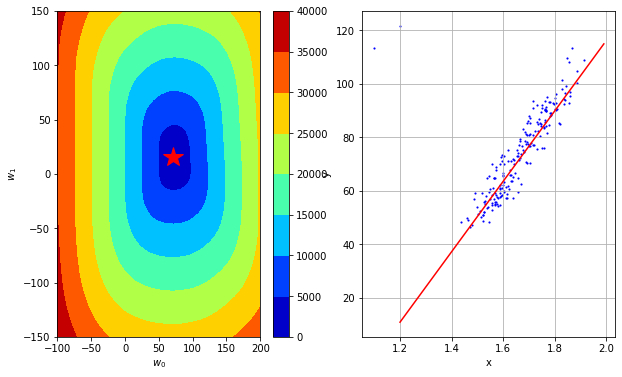

In [79]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1, method="MAE")

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

#### Implementation of subgradient for MAE loss function

In [141]:
def compute_subgradient(y, tx, w):
    """Compute the subgradient."""
    N = len(y)
    e = compute_error_vec(y, tx, w)
    return - tx.T @ np.sign(e) / N

In [147]:
def compute_stochastic_subgradient(y, tx, w):
    """Compute the stochastic subgradient."""
    return compute_subgradient(y, tx, w)

In [165]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """Subgradient descent algorithm."""
    # Define parameters to store w and loss
    N = len(y)
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute subgradient and loss
        # ***************************************************
        subgradient = compute_subgradient(y, tx, w)
        e = compute_error_vec(y, tx, w)
        loss = compute_loss_MAE(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by subgradient
        # ***************************************************
        # w -= gamma * subgradient
        w = w - gamma * subgradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Subgradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
        # non_diff_points_bool is a boolean vector, true in element i if e[i] is close to 0
        non_diff_points_bool = np.isclose(e, np.zeros(len(e)))
        # if any element in e is close to zero:
        if any(non_diff_points_bool):
            for p in np.where(non_diff_points_ind == True):
                print("Non-differentiable point encountered at w_i, i = " + p)

    return losses, ws

In [166]:
def stochastic_subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """Stochastic subgradient descent algorithm."""
    # Define parameters to store w and loss
    N = len(y)
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size=1):
            # ***************************************************
            # INSERT YOUR CODE HERE
            # TODO: compute subgradient and loss
            # ***************************************************
            subgradient = compute_stochastic_subgradient(y, tx, w)
            e = compute_error_vec(y, tx, w)
            loss = compute_loss_MAE(y, tx, w)
            # ***************************************************
            # INSERT YOUR CODE HERE
            # TODO: update w by subgradient
            # ***************************************************
            # w -= gamma * subgradient
            w = w - gamma * subgradient
            # store w and loss
            ws.append(w)
            losses.append(loss)
            print("Subgradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
                  bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
            # non_diff_points_bool is a boolean vector, true in element i if e[i] is close to 0
            non_diff_points_bool = np.isclose(e, np.zeros(len(e)))
            # if any element in e is close to zero:
            if any(non_diff_points_bool):
                for p in np.where(non_diff_points_ind == True):
                    print("Non-differentiable point encountered at w_i, i = " + p)

    return losses, ws

#### GD using MAE

In [163]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 200
# max_iters = 100
# gamma = 0.7
# gamma = 0.001
gamma = 0.7
# gamma = 0.1
# gamma = 0.5
# gamma = 1
# gamma = 2
# gamma = 2.5

# Initialization
w_initial = np.array([0, 0])
# w_initial = np.array([100, 10])
# w_initial = np.array([-1000, 1000])

# Start gradient descent.
start_time = datetime.datetime.now()
subgradient_losses, subgradient_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Subgradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Subgradient Descent(0/199): loss=14961.69678269513, w0=0.7, w1=6.109524327590712e-16
Subgradient Descent(1/199): loss=14820.296782695132, w0=1.4, w1=1.2219048655181425e-15
Subgradient Descent(2/199): loss=14678.89678269513, w0=2.0999999999999996, w1=1.832857298277214e-15
Subgradient Descent(3/199): loss=14537.496782695129, w0=2.8, w1=2.443809731036285e-15
Subgradient Descent(4/199): loss=14396.096782695127, w0=3.5, w1=3.054762163795356e-15
Subgradient Descent(5/199): loss=14254.69678269513, w0=4.2, w1=3.665714596554428e-15
Subgradient Descent(6/199): loss=14113.296782695132, w0=4.9, w1=4.276667029313499e-15
Subgradient Descent(7/199): loss=13971.896782695128, w0=5.6000000000000005, w1=4.887619462072571e-15
Subgradient Descent(8/199): loss=13830.496782695127, w0=6.300000000000001, w1=5.498571894831642e-15
Subgradient Descent(9/199): loss=13689.096782695127, w0=7.000000000000001, w1=6.109524327590714e-15
Subgradient Descent(10/199): loss=13547.69678269513, w0=7.700000000000001, w1=6.7204

In [167]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgradient_losses, subgradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=201, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

#### SGD using MAE loss function

In [168]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 200
# max_iters = 100
# gamma = 0.7
# gamma = 0.001
gamma = 0.7
# gamma = 0.1
# gamma = 0.5
# gamma = 1
# gamma = 2
# gamma = 2.5

# Initialization
w_initial = np.array([0, 0])
# w_initial = np.array([100, 10])
# w_initial = np.array([-1000, 1000])

# Start gradient descent.
start_time = datetime.datetime.now()
subgradient_losses, subgradient_ws = stochastic_subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Subgradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Subgradient Descent(0/199): loss=14961.69678269513, w0=0.7, w1=6.109524327590712e-16
Subgradient Descent(1/199): loss=14820.296782695132, w0=1.4, w1=1.2219048655181425e-15
Subgradient Descent(2/199): loss=14678.89678269513, w0=2.0999999999999996, w1=1.832857298277214e-15
Subgradient Descent(3/199): loss=14537.496782695129, w0=2.8, w1=2.443809731036285e-15
Subgradient Descent(4/199): loss=14396.096782695127, w0=3.5, w1=3.054762163795356e-15
Subgradient Descent(5/199): loss=14254.69678269513, w0=4.2, w1=3.665714596554428e-15
Subgradient Descent(6/199): loss=14113.296782695132, w0=4.9, w1=4.276667029313499e-15
Subgradient Descent(7/199): loss=13971.896782695128, w0=5.6000000000000005, w1=4.887619462072571e-15
Subgradient Descent(8/199): loss=13830.496782695127, w0=6.300000000000001, w1=5.498571894831642e-15
Subgradient Descent(9/199): loss=13689.096782695127, w0=7.000000000000001, w1=6.109524327590714e-15
Subgradient Descent(10/199): loss=13547.69678269513, w0=7.700000000000001, w1=6.7204

In [169]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgradient_losses, subgradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=201, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>